### Анализ данных проточной цитометрии с применением методов Data Science

#### Общая цель проекта:

Разработать и реализовать процедуру предварительной обработки и анализа данных проточной цитометрии, с целью идентификации различных популяций клеток крови. Данные представляют собой измерения интенсивности флуоресцентных меток на клеточных маркерах, полученные с помощью специализированного оборудования.

#### Описание данных:

- FITC-CD4 - представляет измерения интенсивности флуоресценции, связанной с меткой FITC, привязанной к антителам CD4. CD4 — это гликопротеин, который обычно находится на поверхности иммунных клеток, таких как Т-хелперы. Измерения могут указывать на количество или активность CD4-позитивных клеток в образце;

- PE-CD8 - отражает интенсивность флуоресценции метки PE, привязанной к антителам CD8. CD8 — это молекула, присутствующая на цитотоксических Т-лимфоцитах. Измерения помогают оценить присутствие и состояние CD8-позитивных клеток;

- ECD-CD19 - измеряется интенсивность флуоресценции метки ECD, связанной с антителами CD19. CD19 является маркером В-лимфоцитов, и его измерения важны для анализа этих клеток в иммунной системе;

- PC5-CD45 - представляет собой данные о флуоресценции метки PC5, связанной с антителами CD45. CD45 — это молекула, широко выражаемая на всех клетках иммунной системы, и ее измерения могут использоваться для оценки общего количества иммунных клеток;

- PC7-CD3 - отражает интенсивность флуоресценции метки PC7, привязанной к антителам CD3. CD3 присутствует на всех Т-лимфоцитах, и его измерения важны для идентификации и анализа этих клеток.

#### Задачи исследования:

- Этап 1: Разведочный анализ данных (EDA);

- Этап 2. Интеграция данных;

- Этап 3. Очистка данных: пропущенные значения и выбросы;

- Этап 4. Трансформация данных;

- Этап 5. Кластеризация по методу K-средних;

- Выввод

### Этап 1. Разведочный анализ данных (EDA)

#### Подключение библиотек


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster       import KMeans
from sklearn.metrics       import silhouette_score

#### Загрузка данных из файлов

In [ ]:
exp_1 = pd.read_table('flowcyt_exp_1.csv', sep=',')
exp_2 = pd.read_table('flowcyt_exp_2.csv', sep=',')

#### Первичный осмотр данных

In [ ]:
exp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
FITC-CD4    1500 non-null float64
PE-CD8      1498 non-null float64
ECD-CD19    1500 non-null float64
PC5-CD45    1499 non-null float64
PC7-CD3     1500 non-null float64
dtypes: float64(5)
memory usage: 58.7 KB


In [ ]:
exp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    2000 non-null float64
PE-CD8      2000 non-null float64
ECD-CD19    2000 non-null float64
PC5-CD45    2000 non-null float64
PC7-CD3     2000 non-null float64
dtypes: float64(5)
memory usage: 78.2 KB


In [ ]:
print(exp_1.shape)
print(exp_2.shape)

(1500, 5)
(2000, 5)


In [ ]:
exp_1.head(5)

FITC-CD4     PE-CD8  ECD-CD19    PC5-CD45     PC7-CD3
0   6.319052  10.247240  5.823141  348.236416   32.775910
1  17.596262  12.079250  6.377226  161.834871  105.072122
2   8.035667   7.312782  4.571919  143.615860   15.172019
3   2.288821  19.927998  9.303102  231.140357   95.825287
4   0.346184   1.513483  0.964166   53.802542    4.992490

In [ ]:
exp_2.head(5)

FITC-CD4    PE-CD8  ECD-CD19   PC5-CD45    PC7-CD3
0  0.837327  1.183511  0.845910  57.769830   5.396848
1  1.323701  2.126696  1.357080  40.802041   5.512243
2  3.643993  3.363613  3.243449  67.657535  10.886203
3  1.740457  2.077105  1.709940  58.868464   6.974227
4  1.709940  1.324655  2.671244  26.763942   4.044537

В этом наборе данных каждая строка представляет одну клетку крови, а каждый столбец - интенсивность флуоресцентного маркера антитела, обнаруженного на этой клетке крови. В науке о данных строки иногда называют экземплярами или примерами, а столбцы - признаками, атрибутами или переменными.


Обратите внимание на две вещи:   

- Обе таблицы имеют одинаковое количество и типы столбцов. Это означает, что мы можем успешно объединить эти данные;

- Мы также видим пропущенные значения.


### Этап 2. Интеграция данных

In [ ]:
# Объединим обе таблицы в одну.
combined_exp = pd.concat([exp_1,exp_2],axis=0)
# Проверим результирующую таблицу
combined_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


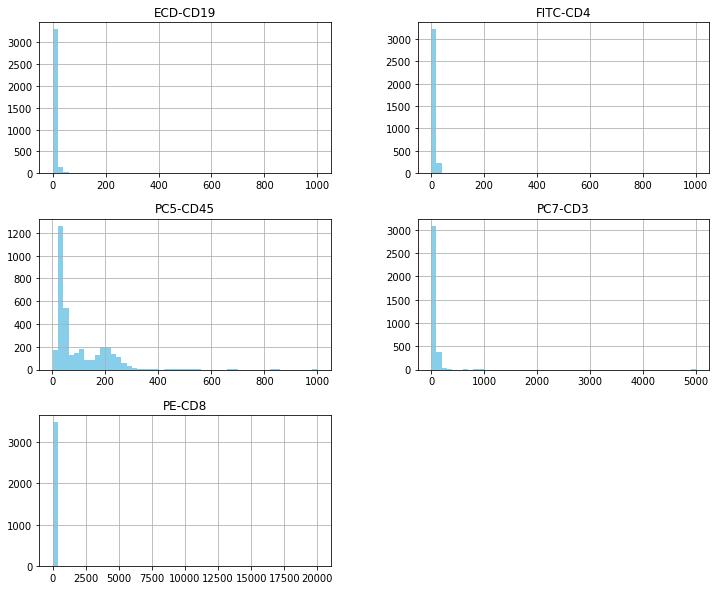

In [ ]:
# Быстрый взгляд на распределение каждого столбца признаков в нашем наборе данных с помощью гистограммы
combined_exp.hist(bins=50, figsize=(12,10), color='skyblue')
plt.show()

### Этап 3. Очистка данных: пропущенные значения и выбросы

### 3a. Работа с пропущенными значениями

В столбцах PE-CD8 и PC5-CD45 есть пропущенные значения.

Мы работаем с отсутствующими точками данных двумя способами:  
- отбросить всю строку с отсутствующим значением;
- заменить недостающие значения средним значением, модой или медианой.

Для демонстрации обоих способов будет скопирован кадр данных. Выбор способа зависит от того, насколько велика доля пропущенных данных.

In [ ]:
# Копирование исходных данных
df = combined_exp.copy()
# Перед удалением строк с отсутствующими значениями
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


In [ ]:
# После удаления строк с отсутствующими значениями
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3497 non-null float64
PE-CD8      3497 non-null float64
ECD-CD19    3497 non-null float64
PC5-CD45    3497 non-null float64
PC7-CD3     3497 non-null float64
dtypes: float64(5)
memory usage: 163.9 KB


In [ ]:
# Копирование исходных данных
df = combined_exp.copy()
# Перед заполнением средней-медианой для строк с отсутствующими значениями
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3498 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3499 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


In [ ]:
# Заполняем недостающие значения средним значением
m1 = df['PE-CD8'].mean()
df['PE-CD8'].fillna(m1, inplace=True)

m2 = df['PC5-CD45'].mean()
df['PC5-CD45'].fillna(m2,inplace=True)

# После заполнения пустых строк средним значением
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3500 non-null float64
PE-CD8      3500 non-null float64
ECD-CD19    3500 non-null float64
PC5-CD45    3500 non-null float64
PC7-CD3     3500 non-null float64
dtypes: float64(5)
memory usage: 164.1 KB


#### Я решил отбросить строки с отсутствующими значениями в исходных данных, поскольку их не так много

In [ ]:
combined_exp.dropna(axis=0, inplace=True)
combined_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3497 entries, 0 to 1999
Data columns (total 5 columns):
FITC-CD4    3497 non-null float64
PE-CD8      3497 non-null float64
ECD-CD19    3497 non-null float64
PC5-CD45    3497 non-null float64
PC7-CD3     3497 non-null float64
dtypes: float64(5)
memory usage: 163.9 KB


### 3b. Поиск выбросов и сводная статистика

In [ ]:
combined_exp.describe()

FITC-CD4        PE-CD8     ECD-CD19     PC5-CD45      PC7-CD3
count  3497.000000   3497.000000  3497.000000  3497.000000  3497.000000
mean      8.259508     14.034130     6.331480    98.286916    31.857014
std      40.406166    339.698436    27.940002    92.890647   100.211465
min       0.000000      0.000000     0.000000     2.225878     0.000000
25%       1.301767      2.037050     1.598360    33.935579     5.271917
50%       2.004625      3.058436     2.522471    49.835253     8.206375
75%       3.675464      9.310731     5.290990   165.527502    19.714374
max     999.970436  20000.000000   999.970436   999.970436  5000.000000

Наблюдения и выводы для каждого столбца:

- Если среднее значение больше медианы, это указывает на то, что данные перекошены в сторону больших значений (справа);

- Если первый квартиль (25-й) ближе к медиане, чем второй, это свидетельствует о том, что распределение перекошено в сторону больших значений;

- Если стандартное отклонение намного меньше диапазона (max-min), это указывает на длинный хвост распределения.

Давайте визуализируем распределение для маркера PE-CD8

In [ ]:
# Определение стилей для заголовков и осей графика
font_title = {'family': 'sans serif', 'color':  'black', 'weight': 'bold', 'size': 14}
font_ax =  {'family': 'sans serif', 'color':  'brown', 'weight': 'normal', 'size': 14}

def plotstats(df, col):
    """
    Функция для визуализации статистических данных определенного столбца DataFrame.

    Эта функция генерирует два графика: боксплот и гистограмму, которые отображаются
    один над другим для указанного столбца DataFrame.

    Параметры:
    df (pandas.DataFrame): DataFrame, содержащий данные для анализа.
    col (str): Название столбца в DataFrame, для которого нужно сгенерировать графики.

    Возвращаемое значение:
    list: Список, содержащий название столбца.

    Описание:
    Первый график (боксплот) используется для визуализации распределения значений,
    исключая пустые значения. Второй график (гистограмма) показывает распределение
    значений по частоте в виде столбиков.
    """

    # Рисование двух графиков, одного над другим
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plt.title("Распределение интенсивности флуоресценции для {}".format(col), fontdict=font_title)
    # Боксплот
    df.dropna().boxplot(col, ax=ax[0], vert=False, return_type='dict')  # Исключение пустых значений в столбце col
    # Построение гистограммы
    temp = df[col].as_matrix()  # Преобразование DataFrame в массив numpy matrix
    ax[1].hist(temp, bins=80, alpha=0.7)
    plt.ylabel('Количество клеток крови')
    plt.xlabel(col)
    return [col]

['PE-CD8']

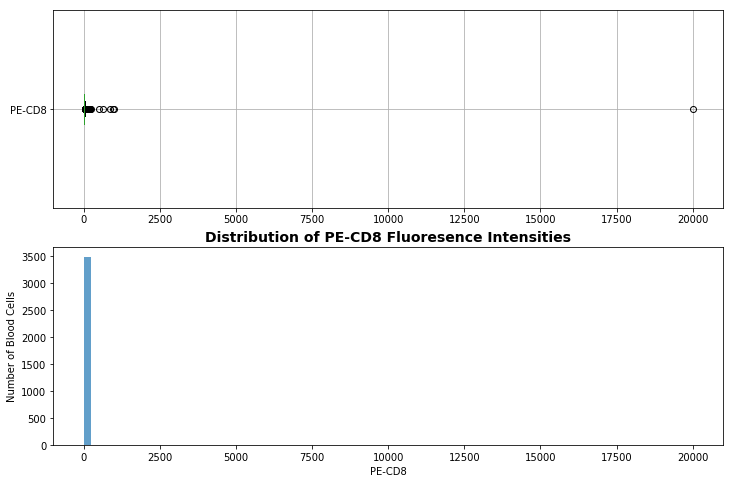

In [ ]:
# Вызов функции
plotstats(combined_exp, 'PE-CD8')

Примечание: графики и гистограммы имеют одинаковую шкалу. Однако боксплот дает нам лучшее представление о выбросах. Обратите внимание, что выбросы не всегда вызваны шумом, поэтому они могут быть значимыми.

In [ ]:
# Удалим значения выбросов, исключив строки в PE-CD8 и PC5-CD45 со значениями, превышающими 10000
combined_exp = combined_exp[combined_exp['PE-CD8']<10000]
combined_exp = combined_exp[combined_exp['PC7-CD3']<5000]

# Посмотрим результат
combined_exp.describe()

FITC-CD4       PE-CD8     ECD-CD19     PC5-CD45      PC7-CD3
count  3495.000000  3495.000000  3495.000000  3495.000000  3495.000000
mean      8.259575     8.316992     6.333020    98.274781    30.442148
std      40.417432    33.271905    27.947881    92.909349    54.604878
min       0.000000     0.000000     0.000000     2.225878     0.000000
25%       1.301767     2.036573     1.598360    33.920320     5.271440
50%       2.004625     3.052714     2.522471    49.804735     8.202561
75%       3.674987     9.258279     5.285268   165.588537    19.690532
max     999.970436   999.970436   999.970436   999.970436   999.970436

['PE-CD8']

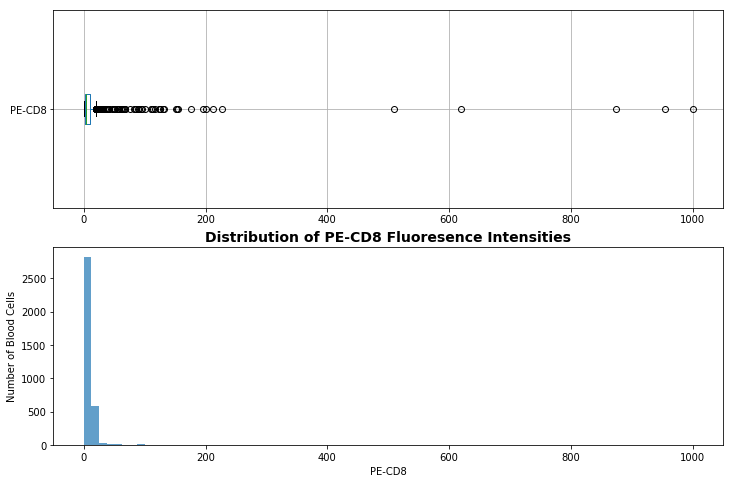

In [ ]:
# Посмотрим график после изменений
plotstats(combined_exp, 'PE-CD8')

### Этап 4. Трансформация данных

#### Пояснение
<b>Преобразование данных</b> часто является необходимым шагом перед выполнением любого моделирования данных, особенно если вы не знаете распределение данных или хотите изменить масштаб данных на гауссовский (нормальный) или перед выполнением уменьшения размерности, например PCA.

Два популярных типа преобразования данных - это нормализация и стандартизация. В науке о данных и машинном обучении эти методы иногда называют масштабированием признаков. В обоих случаях целью является получение значений каждой переменной признака на одной шкале или в ограниченном диапазоне.

- Нормализация, она же Min-Max Scaling: изменяет масштаб значений признака в столбце от 0 до 1. Наибольшее значение будет = 1, а наименьшее = 0;

- Стандартизация, она же Z-нормализация: изменяет масштаб значений признака так, чтобы среднее значение было равно 1, а стандартное отклонение - 1, так что теперь они имеют стандартное нормальное распределение.

In [ ]:
df_stand  = StandardScaler().fit_transform(combined_exp)  ## Z-score normalization
df_minmax = MinMaxScaler().fit_transform(combined_exp)    ## Min-max scaling

In [ ]:
# Сравним средние значения измененных данных с исходными данными
orig_means = combined_exp.describe().loc['mean'].values

stand_means = []
for i in range(5): # 5 features
    stand_means.append(df_stand[:,i].mean())

minmax_means = []
for i in range(5): # 5 features
    minmax_means.append(df_minmax[:,i].mean())

print('Unscaled Means: ', orig_means)
print('Z-score standardization means: ', np.asarray(stand_means))
print('Min-Max rescaled means: ', np.asarray(minmax_means))

Unscaled Means:  [ 8.25957457  8.31699237  6.33302018 98.27478146 30.44214792]
Z-score standardization means:  [ 4.47265814e-17 -1.82972378e-17 -9.14861892e-18 -2.84623700e-17
 -6.09907928e-17]
 Min-Max rescaled means:  [0.00825982 0.00831724 0.00633321 0.09626603 0.03044305]


### Этап 4. Сокращение объема данных/размерности  

Редукция данных направлена на снижение сложности данных высокой размерности.

Это важно для:

- Сжатия данных для экономии времени хранения и обработки;
- обнаружения закономерностей или кластеризации данных;
- обнаружения выбросов.

Каждый признак можно представить как измерение или ось на графике. Нам удобно читать двумерные графики. Трехмерные графики иногда допустимы, но по возможности их следует избегать, а все, что превышает четырехмерность, становится неразборчивым для человеческой зрительной системы. Высокая размерность обычно возникает в научных экспериментах. Например, в демонстрационных данных проточной цитометрии содержится 5 клеточных маркеров или признаков (5-мерность), но в большинстве экспериментов на одну клетку может приходиться 10 20 или 30 маркеров.  

#### PCA

Анализ главных компонент является, вероятно, наиболее широко используемым методом уменьшения размерности для визуализации высокоразмерных данных в науках о жизни.

Формально PCA сводит пространство признаков высокой размерности к подпространству признаков более низкой размерности путем выбора новых осей, называемых главными компонентами, которые сохраняют как можно больше вариаций, присутствовавших в исходных данных.   

<b> Важно учитывать </b>

1. PCA чувствителен к очень большим значениям. Если признак слишком велик, он будет доминировать и станет главным компонентом, поэтому мы <b>ДОЛЖНЫ</b> выполнить масштабирование или нормализацию признака;

2. Предполагается, что подпространство линейно.

In [ ]:
pca = PCA(n_components=2) # Определяем PCA с указанием количества измерений или главных компонент

In [ ]:
# Шаг.1 Нормализация данных по Z-score
data_normed = StandardScaler().fit_transform(combined_exp)

In [ ]:
# Шаг 2. Выполните PCA для нормализованных данных
data_reduce=pca.fit_transform(data_normed)

# Показывает, сколько информации сохраняется после уменьшения, больше - лучше
var_exp = pca.explained_variance_ratio_

## Преобразуем в Pandas: DataFrame
data_reduce = pd.DataFrame(data_reduce, columns=['PC1', 'PC2'])


In [ ]:
# Проверим, сколько вариаций сохранилось от исходных данных высокой размерности
print('Cumulative variance explained by PC1 and PC2: {} %'.format(round(np.sum(var_exp)*100,2)))

Cumulative variance explained by PC1 and PC2: 89.41 %


In [ ]:
print(data_normed.shape) # обратите внимание, что у нас есть 5 столбцов характеристик, или 5 измерений
print(data_reduce.shape) # теперь данные сведены к двум измерениям

(3495, 5)
(3495, 2)


In [ ]:
data_reduce.head() # каждая главная компонента представляет собой ось

PC1       PC2
0  1.104903 -1.640013
1  1.018392 -1.046503
2  0.032542 -0.182891
3  1.239840 -1.366764
4 -0.668707  0.338521

<b> PCA </b> это популярный способ визуализации и поиска скрытых закономерностей в данных.

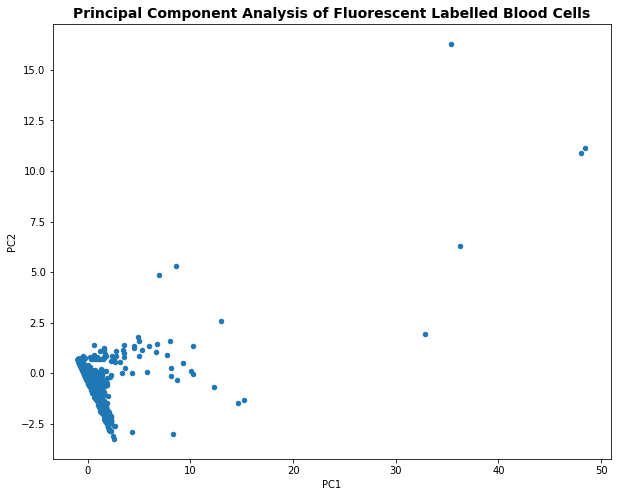

In [ ]:
data_reduce.plot.scatter('PC1', 'PC2', figsize=(10,8))
plt.title('Principal Component Analysis of Fluorescent Labelled Blood Cells', fontsize=14, fontweight='bold')
plt.show()

Наш график выглядит скомканным, потому что у нас есть несколько "выбросов" за пределами PC1=10, которые заслоняют остальные данные. Давайте удалим их и посмотрим, как выглядит график. Опять же, эти выбросы могут быть значимыми точками данных, такими как редкие клетки крови, поэтому не спешите отбрасывать "выбросы". Однако временное исключение крайностей может дать нам лучшее представление о данных. Чтобы продемонстрировать это, я собираюсь переснять данные PCA без экстремальных значений.

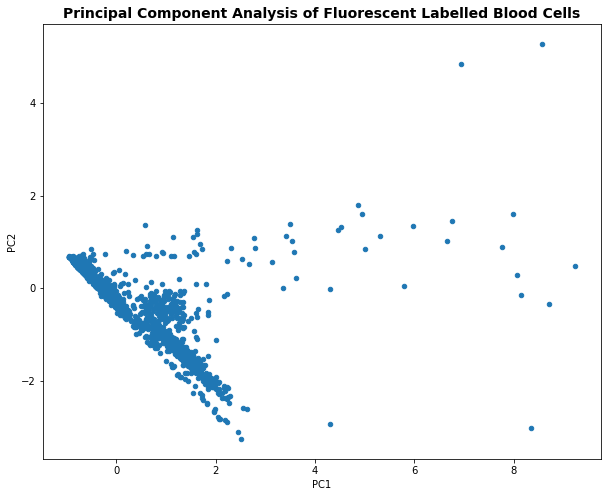

In [ ]:
# Копирование данных PCA, отфильтровывая экстремальные значения
no_outlier = data_reduce[data_reduce['PC1']<10]
# Посмотрим на график
no_outlier.plot.scatter('PC1', 'PC2', figsize=(10,8))
plt.title('Principal Component Analysis of Fluorescent Labelled Blood Cells', fontsize=14, fontweight='bold')
plt.show()

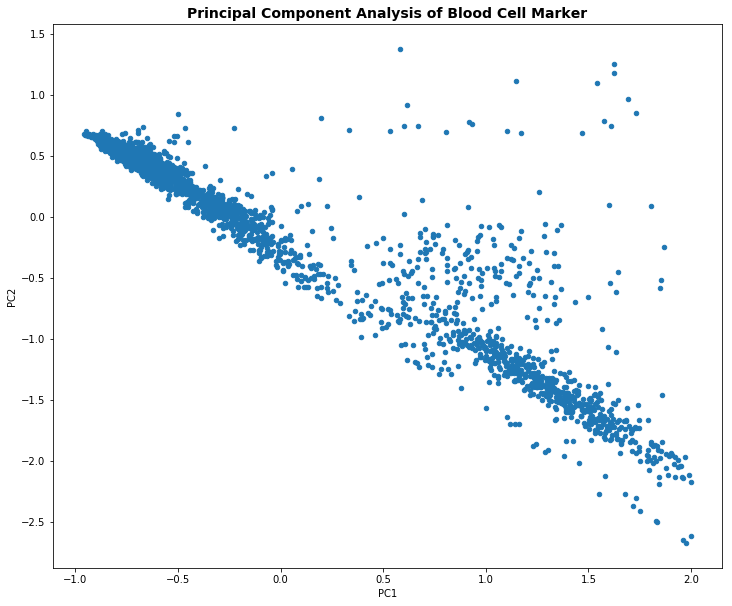

In [ ]:
# Копирование данных PCA, отфильтровывая экстремальные значения
no_outlier = data_reduce[data_reduce['PC1']<2]
# Посмотрим на график
no_outlier.plot.scatter('PC1', 'PC2', figsize=(12,10))
plt.title('Principal Component Analysis of Blood Cell Marker', fontsize=14, fontweight='bold')
plt.show()

### Этап 5. Кластеризация по методу K-средних

Наконец, визуальная польза PCA заключается в способности находить скрытые закономерности в наших данных, сводя их только к релевантным характеристикам. Если у нас есть метки или категории для наших данных, мы можем раскрасить наш график PCA по этим меткам. Однако если у нас нет меток для наших экземпляров, PCA можно использовать в сочетании с алгоритмами кластеризации, такими как K-means, что позволяет обнаруживать мощные данные.

<b> K-means</b> это алгоритм кластеризации без контроля, который широко используется для распределения точек данных по группам на основе их сходства. В данном случае мы имеем немаркированные данные, поскольку у нас нет информации о реальных типах клеток. K-средние можно использовать вместе с PCA для выявления скрытых закономерностей в данных.

#### Запустим алгоритм кластеризации K-means для определения типов клеток

Используем k-means, чтобы проверить, можем ли мы получить отдельные кластеры клеток крови. Мы не знаем, сколько существует типов или кластеров клеток крови, поэтому будем использовать популярный способ определения оптимального количества кластеров

Обязательными параметрами для K- means являются n_кластеров (мы не знаем) и конечно, данные (это могут быть данные, преобразованные с помощью PCA, или исходные данные). Я буду использовать k-means на исходных нормализованных данных.

### Метод локтя + силуэтный анализ для поиска оптимального k кластеров
- Как определить количество кластеров, которые нужно передать в KMeans?  Мы используем итерационный метод для количественной оценки качества каждого кластера, основанный на двух подходах:
       
1) Измерение уровня сходства членов в назначенных им кластерах (среднеквадратичная ошибка, она же искажение)

2) Измерение уровня несходства между кластерами.   
        
Цель - найти оптимальное число кластеров k, которое минимизирует внутрикластерную ошибку (сумму квадратов ошибок) и максимизирует межкластерные различия.  


- <b> Метод локтя </b> заключается в определении значения k, при котором происходит резкое уменьшение искажений;

- <b> Силуэтный анализ </b> - это графический способ измерения того, насколько плотно сгруппированы кластеры. Наилучшим значением является 1, а наихудшим -1. Значения, близкие к 0, указывают на перекрывающиеся кластеры


In [ ]:
# Передадим последовательное число кластеров и оценим, какое число дает наилучшую связность
distortions= []
sil_scores = [] # средний балл силлуэта

for i in range(2,10,1): # начнем с 2 кластеров, увеличиваем на 1 до 10 кластеров.
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(data_normed)
    distortions.append(km.inertia_) # хранить качество сплоченности для каждого размера кластера
    sil_scores.append(silhouette_score(data_normed, km.labels_, metric='euclidean'))


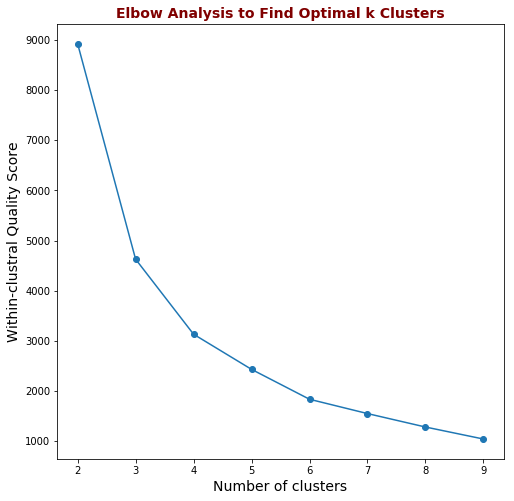

In [ ]:
# Участок для определения "Локтя"
plt.figure(figsize=(8,8))
plt.plot(range(2,10,1), distortions, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Within-clustral Quality Score', fontsize=14)
plt.title('Elbow Analysis to Find Optimal k Clusters', fontsize=14, fontweight='bold', color='maroon')
plt.show()

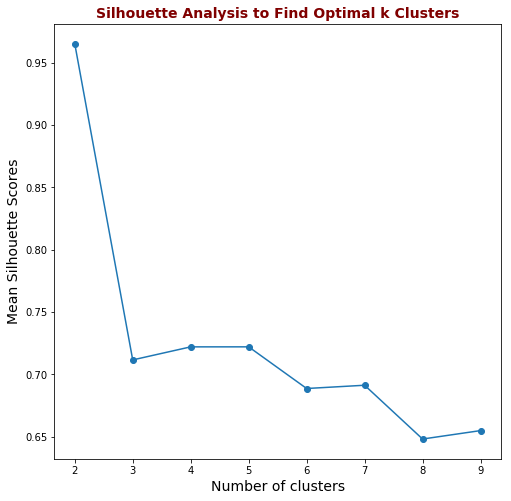

In [ ]:
# Визуализация "Силуэта"
plt.figure(figsize=(8,8))
plt.plot(range(2,10,1), sil_scores, marker='o')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Mean Silhouette Scores', fontsize=14)
plt.title('Silhouette Analysis to Find Optimal k Clusters', fontsize=14, fontweight='bold', color='maroon')
plt.show()

Напомню, что наилучшее значение силлуэта равно 1, а наихудшее -1. Значения, близкие к 0, указывают на перекрывающиеся (нечистые) кластеры.

Мой подход заключается в том, чтобы иногда выбирать количество кластеров, которое является компромиссом между двумя методами. В данном случае k=5 кажется хорошим кандидатом, удовлетворяющим обоим методам оценки.

Теперь, когда мы определили оптимальное количество кластеров, давайте запустим KMeans на исходных данных, а затем раскрасим наш график PCA в соответствии с каждым кластером, чтобы визуализировать различные типы клеток крови

In [ ]:
# подгонка Kmeans к нормализованным данным высокой размерности
kmeans = KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=100, random_state=0).fit(data_normed)
# извлечение кластера, присвоенный каждому экземпляру (ячейке)
clusters = kmeans.labels_
# добавим к нашему кадру данных PCA, чтобы мы могли раскрасить РСА по типам кластеров
data_reduce['Cluster'] = clusters

In [ ]:
print(clusters.shape)
print(data_reduce.shape)
# Обратите внимание, что PCA сокращает только число измерений (столбцов), но не число выборок!!!

(3495,)
(3495, 3)


In [ ]:
data_reduce.head()

PC1       PC2  Cluster
0  1.104903 -1.640013        2
1  1.018392 -1.046503        2
2  0.032542 -0.182891        0
3  1.239840 -1.366764        2
4 -0.668707  0.338521        0

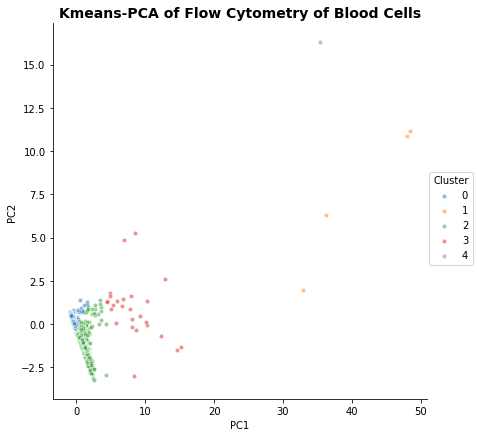

In [ ]:
# Визуализация
seaborn.pairplot( x_vars= 'PC1',y_vars='PC2', data=data_reduce, hue='Cluster', size=6,
                plot_kws=dict(alpha=0.5, s=20)) # s - размер маркеров, alpha - прозрачность

plt.title('Kmeans-PCA of Flow Cytometry of Blood Cells', fontsize=14, fontweight='bold')
plt.show()

#### Kmeans-PCA смог определить различные типы клеток крови на основе различий в измерениях флуоресцентных антител, специфичных для клеток.

####  Визуализируем без экстремальных значений, чтобы увидеть сплющенные кластеры крупным планом

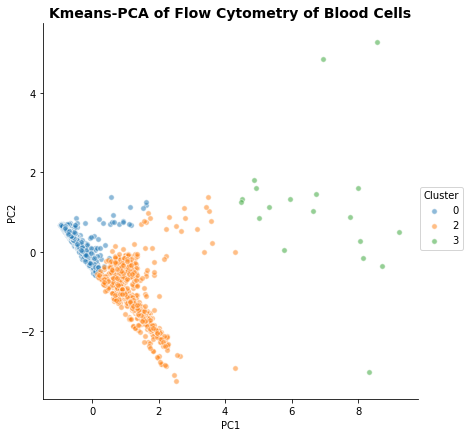

In [ ]:
# Копирование данных PCA, отфильтровывая экстремальные значения
no_outlier = data_reduce[data_reduce['PC1']<10]

seaborn.pairplot( x_vars= 'PC1',y_vars='PC2', data=no_outlier, hue='Cluster', size=6,
                plot_kws=dict(alpha=0.5, s=30))

plt.title('Kmeans-PCA of Flow Cytometry of Blood Cells', fontsize=14, fontweight='bold')
plt.show()

### Наблюдения

Мы ясно видим, почему не стоит отбрасывать экстремальные значения: при отборе образцов с PC1 меньше 10 мы отбросили целых 2 кластера клеток крови! Однако иногда полезно временно опустить экстремальные значения, которые заслоняют другие точки данных.

### Вывод

В ходе первичного анализа, мы с уверенностью можем сказать, что в наблюдаемой среде обнаружено 5 видов клеток.